In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
csv_file: str = "20230706.csv"
df = pd.read_csv(csv_file, decimal=",", header=0, index_col=0)
df_ = df[df["converge"] == True]
df_

,AoA,CL,dudy min,converge
0,0.5,0.6778875375000001,65951.95828167339,True
1,0.8785156249999999,0.7529519143999999,62293.420454429666,True
2,1.5,0.8845942107999999,86948.05889688394,True
3,1.6355468749999997,0.9157072210999999,88126.66741206308,True
4,2.0140624999999996,1.0054653949999999,80840.55579157965,True
5,2.2033203125,1.05327408,77803.85823310337,True
6,2.392578125,1.1016826,75774.0944395984,True
7,2.75,1.1938911939999997,71710.73661866268,True
8,2.77109375,1.198667654,72787.85267081994,True
9,2.8341796875,1.209657308,74912.04440335222,True


In [3]:
AoA = df_["AoA"].astype(float).to_numpy()
CL = df_["CL"].astype(float).to_numpy()

In [39]:
# f_CL_AoA = interpolate.interp1d(AoA, CL, kind="cubic")
# f_CL_AoA = interpolate.CubicSpline(AoA, CL)
f_CL_AoA = interpolate.PchipInterpolator(AoA, CL)
AoA_new = np.linspace(AoA.min(), AoA.max(), 100)
CL_new = f_CL_AoA(AoA_new)

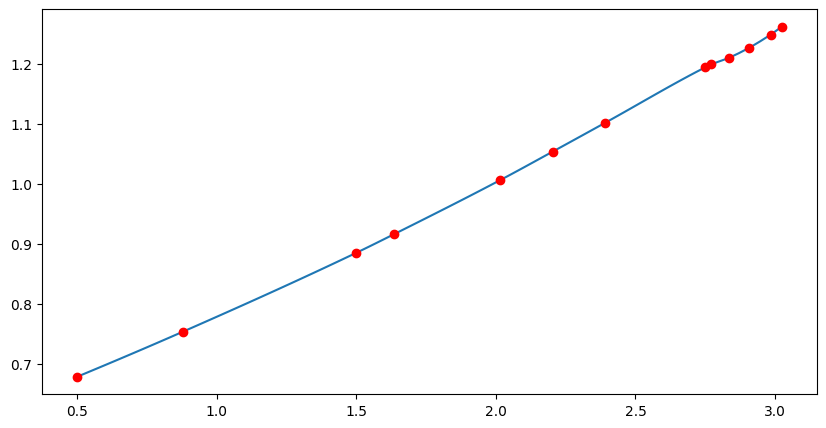

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(AoA_new, CL_new)
plt.scatter(AoA, CL, color="red", zorder=10)
plt.show()

In [41]:
# get dCL/dAoA use linear fit method
# use 4 points ahead for fitting
nn = 3
AoA_linear = AoA[:nn]
CL_linear = CL[:nn]
CLalpha0 = np.polyfit(AoA_linear, CL_linear, 1)[0]
CLalpha0

0.20721140233429852

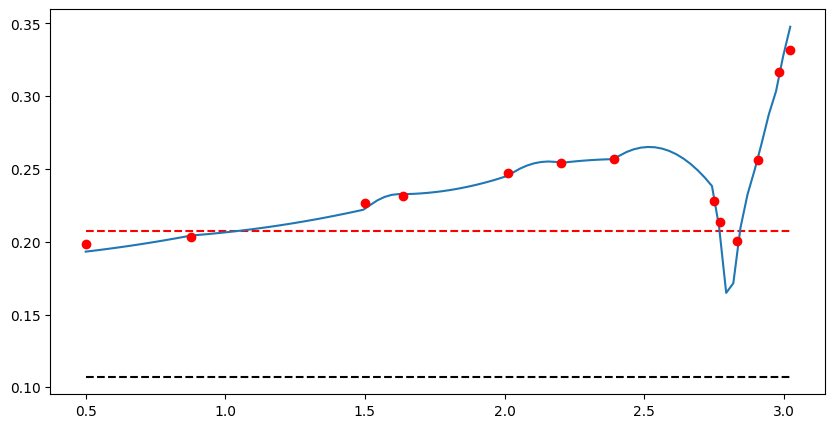

In [42]:
# calculate dCL/dAoA
dCL_dAoA = f_CL_AoA(AoA_new, nu=1)
plt.figure(figsize=(10, 5))
plt.scatter(AoA, np.gradient(CL, AoA), color="red", zorder=10)
plt.hlines(CLalpha0, AoA.min(), AoA.max(), color="red", linestyles="dashed")
plt.hlines(CLalpha0-0.1, AoA.min(), AoA.max(), color="black", linestyles="dashed")
plt.plot(AoA_new, dCL_dAoA)
plt.show()